# Hydrogen Atom

We solve for the eigenstates of the hydrogen atom. The problem is discretizedon a tensor grid.

In [3]:
using Plots
using LaTeXStrings
using Interact

# set up discrete space grid
n = 50
L = 20.
x = collect(linspace(-L, L, n + 2))[2:end-1]
Δx = x[2] - x[1]
X = kron(x, ones(n), ones(n))
Y = kron(ones(n), x, ones(n))
Z = kron(ones(n), ones(n), x)

# discretization of the Hamiltonian
L_1D = spdiagm((-0.5 / Δx^2 * ones(n - 1), -0.5 / Δx^2 * -2. * ones(n), -0.5 / Δx^2 * ones(n - 1)), (-1, 0, 1))
I = speye(n)
L = kron(L_1D, I, I) + kron(I, L_1D, I) + kron(I, I, L_1D)
V = spdiagm(-1 ./ sqrt(X.^2 + Y.^2 + Z.^2))
H = L + V

# solve for the first few eigenvalues
@time (eigenvalues, eigenfunctions) = eigs(H, which=:SR)
eigenvalues[1]

 41.798358 seconds (47.48 k allocations: 5.450 GB, 1.07% gc time)


-0.4453532810549506

Eigenfunctions are plotted as a countour plot in the $z = \text{const}$ plane.

Interact.Slider{Int64}(Signal{Int64}(3, nactions=0),"k",3,1:6,true)

Interact.Slider{Int64}(Signal{Int64}(25, nactions=0),"j",25,1:50,true)

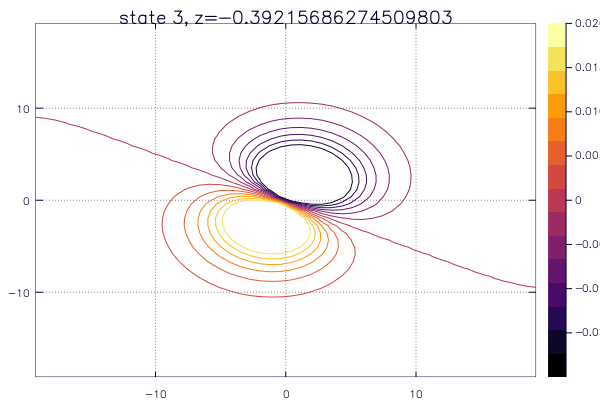

In [4]:
gr()
@manipulate for k in 1:6, j = 1:n
    ef = reshape(eigenfunctions[:, k], n, n, n)
    contour(x, x, ef[:, :, j], title="state $k, z=$(x[j])", zlim=[-0.02, 0.02])
end

In [5]:
issym(H)

true